In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Brownian Motion

$$\begin{align}
B_0 &= 0 \\
B_{n\Delta t} &= B_{(t-1)\Delta t} + \sqrt{\Delta t} z_n
\end{align}$$

where $z_n \sim \mathcal{N}(0,1)$.

In [2]:
# Alternatively we can drop the T variable and merely stipulate an increment + number of points to compute
def BM_path(T, time_points):
    increment = T/time_points
    trajectory = [0]
    for i in range(time_points):
        realization = trajectory[-1]+np.sqrt(increment)*np.random.normal()
        trajectory.append(realization)
    return trajectory

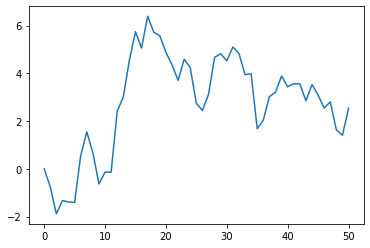

In [3]:
# to-do: x-axis should be scaled to end with value T
plt.plot(BM_path(50,50))

# Poisson process (MIGHT NOT BE CORRECT. CHECK LATER)

The random numbers with exponential distribution can be computed using `numpy.random.exponential`:
https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html

The exponential function above uses a different parameter $\beta = 1/\lambda$.

In [4]:
def poisson_path(intensity,T,time_points):
    #parameters & discretization
    time_points -= 1
    increment = T/time_points
    beta = 1/intensity
    
    #generating trajectory for s process
    s_trajectory = [0]
    for i in range(time_points):
        realization = s_trajectory[-1]+np.random.exponential(beta)
        s_trajectory.append(realization)
    
    #poisson trajectory
    poisson_trajectory = [0]
    for i in range(1,time_points+1):
        realization = max([k for k in range(0,time_points) if s_trajectory[k] <= i*increment])
        poisson_trajectory.append(realization)
    
    return poisson_trajectory

[0, 0, 1, 3, 3, 3, 4, 6, 8, 9, 11, 13, 15, 16, 18, 18, 18, 19, 19, 21, 22, 23, 23, 25, 26, 27, 28, 28, 28, 28]


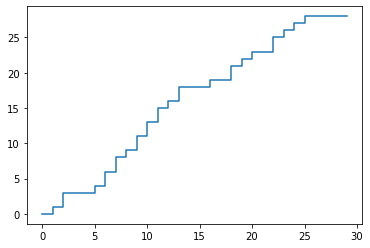

In [5]:
p = poisson_path(1, 30, 30)
plt.step([i for i in range(0,30)],p)
print(p)

# Same as above but with the method described by the professor in the slides (exponential spacings)

In [6]:
def poisson_path_2(intensity, T, time_points):
    #parameters & discretization
    time_points -= 1
    increment = T/time_points
    beta = 1/intensity
    
    #generating trajectory for s process
    s_trajectory = [0]
    for i in range(time_points):
        realization = s_trajectory[-1]-np.log(np.random.uniform())/intensity
        s_trajectory.append(realization)
    
    #poisson trajectory
    trajectory = [0]
    times = [0]
    for i in range(1,time_points+1):
        realization = max([k for k in range(0,time_points+1) if s_trajectory[k] <= i*increment])
        trajectory.append(realization)
        times.append(i*increment)
    
    return dict(zip(times, trajectory))

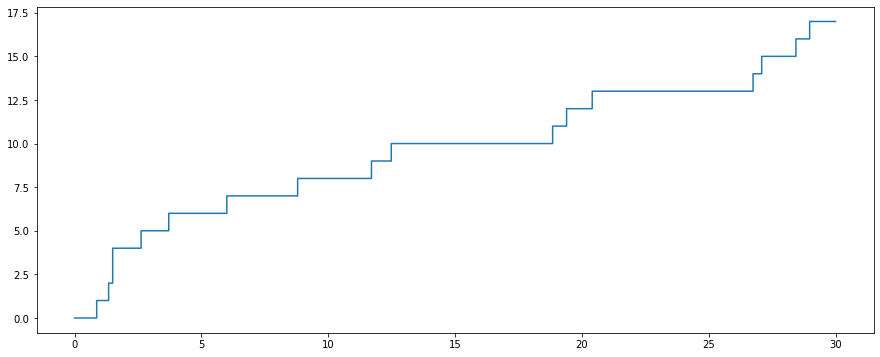

In [7]:
p = poisson_path_2(0.5, 30, 3000)
plt.figure(figsize = (15,6))
plt.step(p.keys(),p.values())

## Prof said that we should try comparing our implementation of the Poisson process with someone else's. We do this next

# Discretizing the Lévy measure

$$ \nu(dx) = d \frac{\exp(bx/a)}{x \sinh(\pi x /a)} \, dx$$

In [8]:
def meixner_meas(x, a = 0.3977,b = -1.4940,d = 0.3462):
    return d*(np.exp(b*x/a)/(x*np.sinh(np.pi*x/a)))

In [9]:
meixner_meas(-0.5)

0.17456211927149787

(-0.01, 0.01)

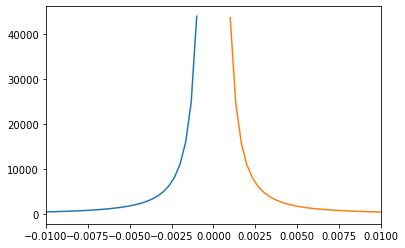

In [10]:
# code to plot meixner density function
x1 = np.linspace(-1,-0.001,3000)
x2 = np.linspace(0.001,1,3000)
plt.plot(x1,meixner_meas(x1))
plt.plot(x2,meixner_meas(x2))
plt.xlim(-0.01,0.01)

`ilb_partition(k, alpha)` returns an `np.array` 

In [11]:
import scipy.integrate as integrate

# creates a partition using Inverse Linear Boundaries method described in Schouten's book
def ilb_partition(k, alpha):
    lhs = [-alpha*i**(-1) for i in range(1,k+2)]
    #rhs = [alpha/i for i in range(1,k+2)]
    rhs = [-x for x in reversed(lhs)]
    return lhs, rhs

left_part, right_part = ilb_partition(50,0.2)

left_lambdas = [integrate.quad(meixner_meas, left_part[i], left_part[i+1])[0] for i in range(len(left_part)-1)]
right_lambdas = [integrate.quad(meixner_meas, right_part[i], right_part[i+1])[0] for i in range(len(right_part)-1)]
lambdas = left_lambdas + right_lambdas

#lambdas = [integrate.quad(lambda x: meixner_meas(x), a_array[i],a_array[i+1] )[0] for i in range(len(a_array)-1)]

In [12]:
lambdas

[0.3024730637048456,
 0.27759185212020654,
 0.26281774528290813,
 0.2538236772735484,
 0.24785345618882504,
 0.24361956345784855,
 0.24046631753402806,
 0.23802897052955838,
 0.23608952926280655,
 0.23451003056342792,
 0.23319902758048724,
 0.23209356129945188,
 0.23114889258592072,
 0.2303323676853072,
 0.22961960171441353,
 0.228992020463813,
 0.2284352288561289,
 0.2279378993252063,
 0.22749099676354964,
 0.22708722696699862,
 0.22672063689370056,
 0.2263863201590602,
 0.22608019682373787,
 0.22579884650440218,
 0.22553938033571325,
 0.22529934163085039,
 0.22507662800950637,
 0.22486942977132876,
 0.22467618069520995,
 0.22449551843744955,
 0.22432625241347198,
 0.22416733756412643,
 0.2240178527863229,
 0.22387698308858323,
 0.22374400474222103,
 0.2236182728575089,
 0.22349921093518102,
 0.22338630203636844,
 0.22327908128593096,
 0.22317712948007204,
 0.2230800676130362,
 0.22298755217238783,
 0.222899271079816,
 0.22281494017649614,
 0.2227343001695952,
 0.22265711397094665,
 0

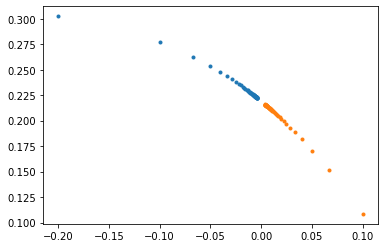

In [13]:
plt.plot(left_part[:-1], left_lambdas, ".")
plt.plot(right_part[:-1],right_lambdas,".")

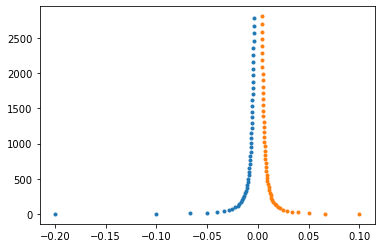

In [14]:
plt.plot(left_part[:-1], list(map(meixner_meas, left_part[:-1])), ".")
plt.plot(right_part[:-1], list(map(meixner_meas, right_part[:-1])), ".")

## Approximation of small jumps by Brownian motion

$$ \sigma^2(\epsilon) = \int_{-\epsilon}^\epsilon x^2 \, d\nu(x) $$

In [15]:
#this will be reused
x_sqrd = lambda x : x**2*meixner_meas(x) if x!=0 else 0

# epsilon must be > 0
def sigma_sqrd(epsilon):
    return integrate.quad(x_sqrd, -epsilon, epsilon)[0]

c_left = [-np.sqrt(integrate.quad(x_sqrd, left_part[i], left_part[i+1])[0]/lambdas[i]) for i in range(len(left_part)-1)]
c_right = [np.sqrt(integrate.quad(x_sqrd, right_part[i], right_part[i+1])[0]/lambdas[i]) for i in range(len(right_part)-1)]

c = c_left + c_right

In [16]:
len(c_left)

50

From Schoutens' pg. 63 we have that
$$ \gamma = ad \tan(b/2) -2d \int_1^\infty \frac{\sinh(bx/a)}{\sinh(\pi x/a)} \, dx$$

In [17]:
def gamma(a = 0.3977,b = -1.4940,d = 0.3462):
    return a*d*np.tan(b/2)-2*d*integrate.quad(lambda x: np.sinh(b*x/a)/np.sinh(np.pi*x/a), 1, 20)[0]

In [18]:
# just so we're not repeatedly computing the integrals in these function later on
gamma_ = gamma()
sigma_ = np.sqrt(sigma_sqrd(right_part[0]))

#the other approximation given in the slides
#sigma_ = np.sqrt(2*0.0890*5.0262/np.pi)*np.sqrt(right_part[0])

We want to simulate the process

$$ X^d_t = \gamma t + \sigma(\epsilon) B_t + \sum_{i=1}^d c_i (N_t^{(i)} - \lambda_i t \mathbb{1}_{|c_i|<1})$$

because, since the Meixner process has no Brownian component, we have $\tilde \sigma ^2 = \sigma^2(\epsilon)$.

In [19]:
indicator = lambda cond : 1 if cond else 1

In [20]:
sigma_

0.018539908061257437

In [23]:
def meixner_trajectory(T, time_points):
    # increment continues to be useless
    #increment = T/time_points
    
    #generate one BM trajectory
    bm = BM_path(T, time_points)
    
    #generate 100 poisson process trajectories with the corresponding, previously computed intensities
    N = [list(poisson_path_2(l, T, time_points).values()) for l in lambdas]
    trajectory = []
    
    for i in range(time_points):
        
        # the number 100 below is d, which should probably not be hardcoded
        s = [c[j]*( N[j][i] - lambdas[j]*i*T/time_points*indicator(np.abs(c[j]) < 1) ) for j in range(100)]
        realization = gamma_*i*T/time_points + sigma_*bm[i] + sum(s)
        trajectory.append(realization)
    
    return trajectory

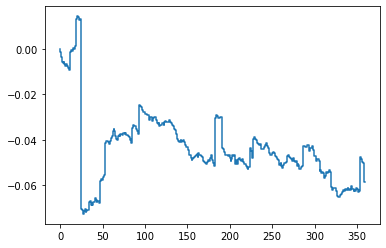

In [25]:
# clearly not working correctly
plt.step([i for i in range(360)], meixner_trajectory(1, 360))